<a href="https://colab.research.google.com/github/DanielTusingwire/Simulation-Modeling-Labs/blob/main/Bicycle_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import lxml.html as lh

In [3]:
bike = 'https://www.worldometers.info/bicycles/'
page = requests.get(bike)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:12]] # check the length of the first 12 row

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [4]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0
for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Country 
2:Quantity
3:Year


In [5]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row

    if len(T)!=3: #if row is not size 3, //tr data is not from the table.
        break

    i = 0 #i is the index of the first column

    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()

        col[i][1].append(data) #append the data to the empty list of the i'th column

        i+=1 #increment i for the next column

In [6]:
[len(C) for (title,C) in col]

[25, 25, 25]

In [7]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)
df

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990
6,Indonesia,"22,300,000",1982
7,Italy,"23,000,000",1995
8,UK,"20,000,000",1995
9,France,"20,000,000",1995


In [8]:
df.dtypes

Country     object
Quantity    object
Year        object
dtype: object

#DATA CLEANING


In [9]:
df2 =df.drop([df.index[0]])
df2.head()

,Country,Quantity,Year
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990


In [10]:
#This my code for replacing the symbol with an empty space in QTY and coverting them from string to float

# First, i replace commas with nothing (effectively removing them)
df2['Quantity'] = df2['Quantity'].str.replace(',', '', regex=False)

# Then, i convert the Quantity column to float
df2['Quantity'] = df2['Quantity'].astype(float)


print(df2.head())



   Country      Quantity  Year
1    China   450000000.0  1992
2      USA   100000000.0  1995
3    Japan    72540000.0  1996
4  Germany    62000000.0  1996
5    India    30800000.0  1990


In [11]:
df2.head()

,Country,Quantity,Year
1,China,450000000.0,1992
2,USA,100000000.0,1995
3,Japan,72540000.0,1996
4,Germany,62000000.0,1996
5,India,30800000.0,1990


In [12]:
df2.dtypes

Country      object
Quantity    float64
Year         object
dtype: object

# Convert Year and Quantity back to Int


In [13]:
df2['Year'] = df2.Year.astype(int)
df2['Quantity'] = df2.Quantity.astype(int)

df.head()

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996


In [14]:
df2.dtypes

Country     object
Quantity     int64
Year         int64
dtype: object

# **Plot Chars and Graphs**
1. Categorical variables

A. Let's look at the relationship between "Year" and "Quantity"

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Year', ylabel='Quantity'>

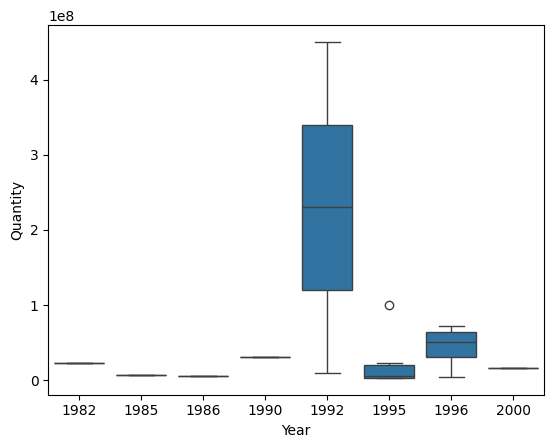

In [16]:
sns.boxplot(x="Year", y="Quantity", data=df2)

Text(0.5, 1.0, 'Bicycles sales')

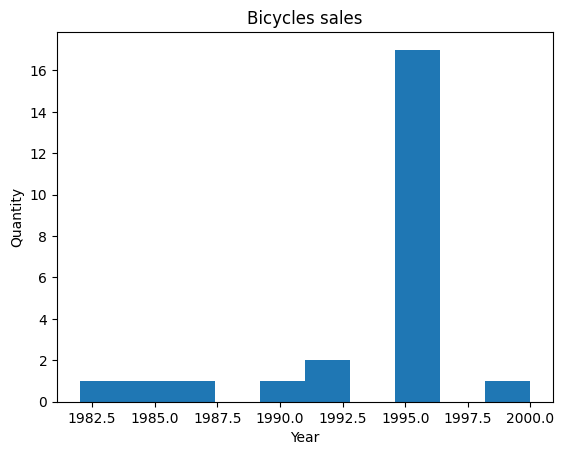

In [17]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df2["Year"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

Text(0.5, 1.0, 'Bicycles sales')

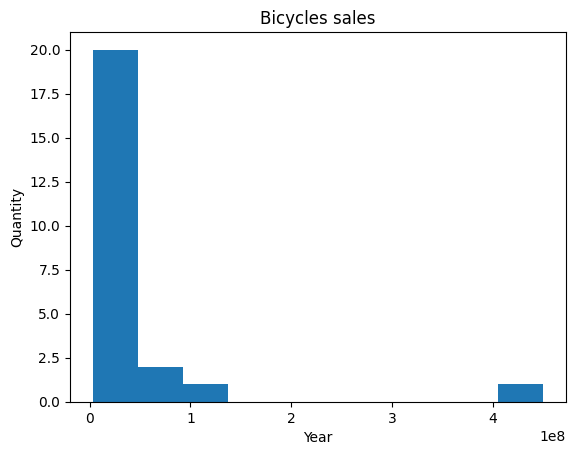

In [18]:
plt.pyplot.hist(df2["Quantity"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

Text(0.5, 1.0, 'Bicycles sales')

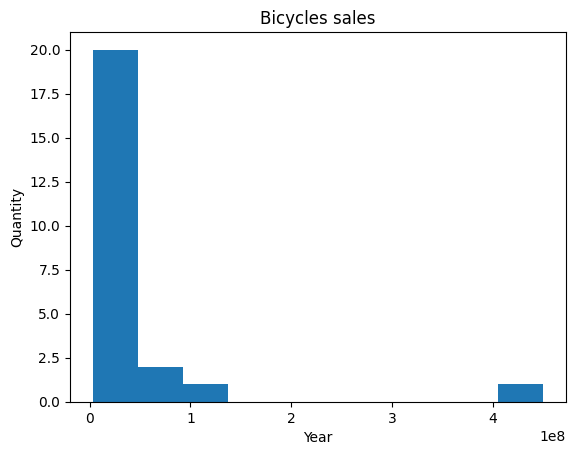

In [19]:
plt.pyplot.hist(df2["Quantity"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

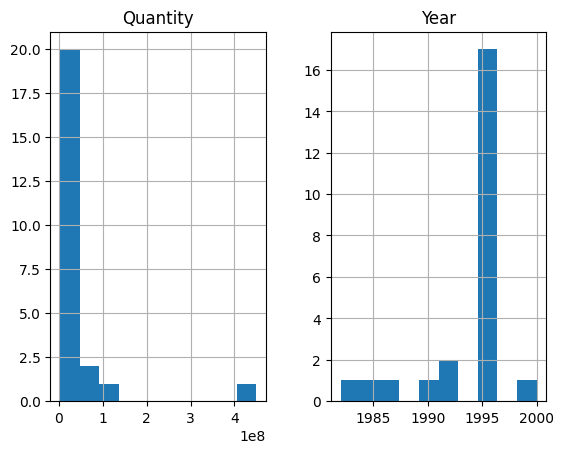

In [20]:
df2.hist()

# **Class Activity**
Plot A Pie Chart

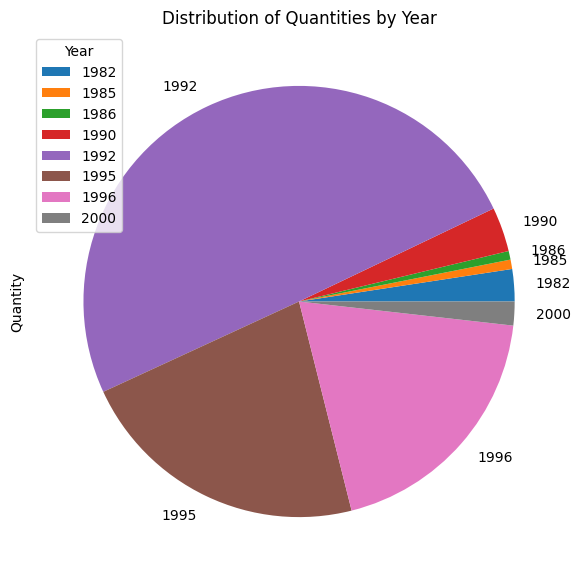

In [31]:
import matplotlib.pyplot as plt


# Summing quantities by year
quantity_by_year = df2.groupby('Year')['Quantity'].sum()

# Creating the pie chart
plt.figure(figsize=(10, 7))
pie_wedges = plt.pie(quantity_by_year, labels=quantity_by_year.index)

plt.legend(pie_wedges[0], quantity_by_year.index, title="Year", loc="upper left")
plt.ylabel('Quantity')

plt.title('Distribution of Quantities by Year')

plt.show()



In [33]:
df2.sort_values(by='Quantity', ascending=True, inplace=True)
# get top 25 countries
df21 = df2['Quantity'].tail(25)

df21

24      3000000
23      3250000
22      3300000
21      3500000
20      3800000
19      4500000
18      5000000
17      5200000
16      6000000
14      6000000
15      6500000
13      6950000
12     10150000
11     16500000
9      20000000
8      20000000
6      22300000
7      23000000
5      30800000
10     40000000
4      62000000
3      72540000
2     100000000
1     450000000
Name: Quantity, dtype: int64

In [34]:
df25 = df2[df2['Year'].between(1980, 2013)]

df25.columns = df25.columns.str.strip()

df25.sort_values(by='Quantity', ascending=False, inplace=True)
top_25_countries = df25.head(25)

top_25_countries

,Country,Quantity,Year
1,China,450000000,1992
2,USA,100000000,1995
3,Japan,72540000,1996
4,Germany,62000000,1996
10,Brazil,40000000,1996
5,India,30800000,1990
7,Italy,23000000,1995
6,Indonesia,22300000,1982
8,UK,20000000,1995
9,France,20000000,1995


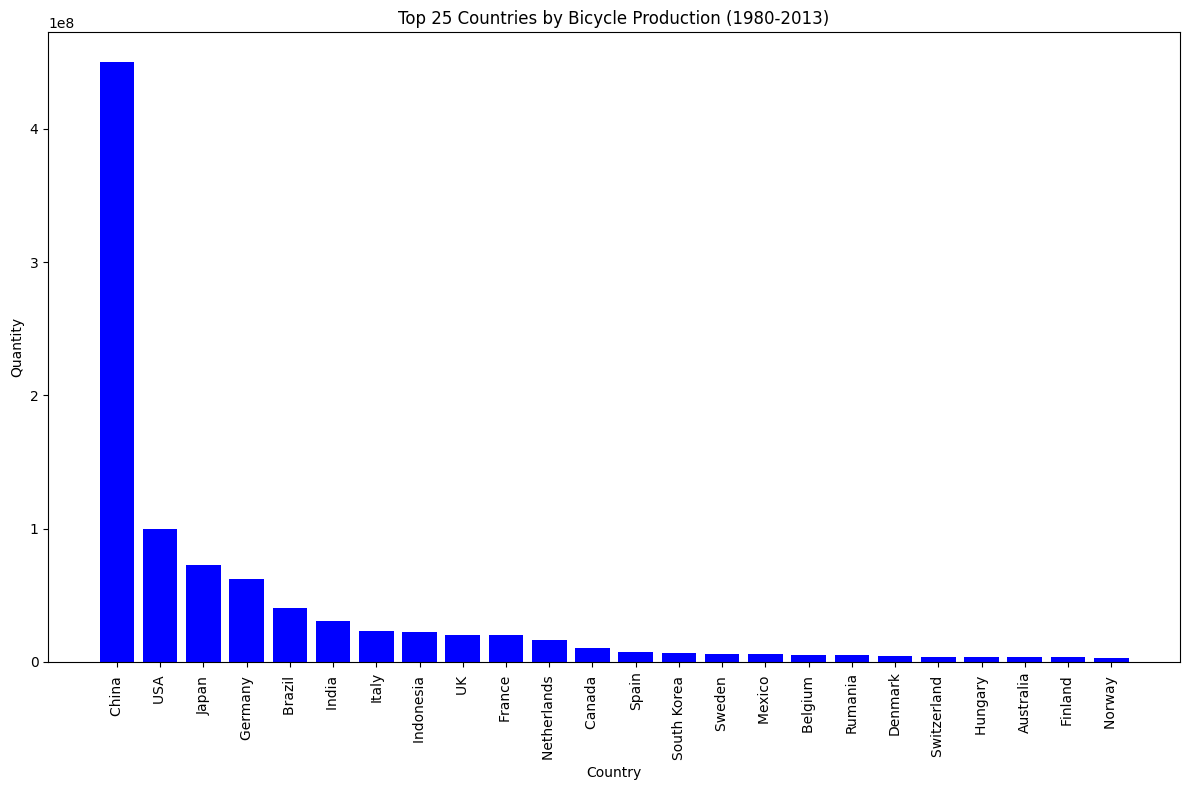

In [36]:

plt.figure(figsize=(12, 8))
plt.bar(top_25_countries['Country'], top_25_countries['Quantity'], color='blue', orientation='vertical')

plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 25 Countries by Bicycle Production (1980-2013)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()